In [22]:
import os
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 处理为单通道
def convert_images_to_grayscale(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            file_path = os.path.join(directory, filename)
            with Image.open(file_path) as img:
                # 将图像转换为灰度格式
                grayscale_img = img.convert("L")  # "L" 代表灰度模式
                # 保存转换后的图像，可以选择覆盖原始文件或保存到新的文件
                grayscale_img.save(file_path)  # 如果需要，可以修改保存路径

# 指定你的图像文件夹路径
directory_path = "../datadrive/bijie/labels/train"
convert_images_to_grayscale(directory_path)

In [32]:
# 路径到你的PNG文件
image_path = '../datadrive/bijie_five_crop_0.5/imgs/train/4.jpg'

# 加载图像
image = Image.open(image_path)

# 转换为PyTorch张量
transform = transforms.ToTensor()  # 这个转换也会把像素值从0-255转换到0-1
tensor_image = transform(image)

# 检查维度
print("Tensor shape:", tensor_image.shape)  # 应该输出 [C, H, W]

# 检查是否满足特定形状，例如 3x448x448
expected_shape = (3, 224, 224)
if tensor_image.shape == expected_shape:
    print("图像维度正确。")
else:
    print("图像维度不正确。")

Tensor shape: torch.Size([3, 224, 224])
图像维度正确。


In [16]:
# 输出值的类别数量

def count_pixel_categories(image_path):
    # 打开图像
    image = Image.open(image_path)
    # 获取图像的像素值
    pixels = image.getdata()
    # 获取像素值的类别数
    categories = set(pixels)
    # 返回类别数
    return len(categories)

# 指定图片路径
image_path = '../datadrive/bijie/labels/train/df002.png'
# 获取像素值类别数
num_categories = count_pixel_categories(image_path)
# 输出结果
print("The number of pixel categories in the image is:", num_categories)


The number of pixel categories in the image is: 2


将所有标签固定尺寸，保持单通道，填充多余部分，并转换为二值图像

In [20]:
from PIL import Image, ImageOps
import os

def resize_and_pad_label(img, size=(448, 448)):
    # 转换为灰度图像（如果原始图像不是单通道的话）
    # img = img.convert("L")
    
    # 计算等比例缩放因子
    ratio = min(size[0] / img.size[0], size[1] / img.size[1])
    new_size = (int(img.size[0] * ratio), int(img.size[1] * ratio))
    img = img.resize(new_size, Image.NEAREST)  # 使用最近邻插值保持二值性

    # 创建一个新的单通道图像，大小为448x448，背景色为黑色
    new_img = Image.new("L", size, 0)
    # 将缩放后的图像复制到中心
    new_img.paste(img, ((size[0] - new_size[0]) // 2, (size[1] - new_size[1]) // 2))
    return new_img

def process_label_images(img_dir, output_dir, size=(448, 448)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    img_files = os.listdir(img_dir)
    for img_file in img_files:
        img_path = os.path.join(img_dir, img_file)
        with Image.open(img_path) as img:
            img_resized = resize_and_pad_label(img, size)
            output_path = os.path.join(output_dir, img_file)
            img_resized.save(output_path, format='PNG')

# 调用函数
label_img_dir = '../datadrive/bijie/labels/train'  # 标签图像的目录
output_label_dir = '../datadrive/bijie/labels/train_resized'  # 输出目录
process_label_images(label_img_dir, output_label_dir)

def convert_image_values(img):
    # 将图像数据转换为numpy数组
    data = np.array(img)
    # 将255转换为1（假设只有0和255两种值）
    data = np.where(data == 255, 1, 0)
    # 将numpy数组转回图像
    return Image.fromarray(data.astype(np.uint8))

def binary_images(img_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    img_files = os.listdir(img_dir)
    for img_file in img_files:
        img_path = os.path.join(img_dir, img_file)
        with Image.open(img_path) as img:
            # 确保图像是单通道灰度图
            img = img.convert("L")
            converted_img = convert_image_values(img)
            output_path = os.path.join(output_dir, img_file)
            # 保存转换后的图像
            converted_img.save(output_path, format='PNG')

output_dir = 'path_to_output_images'  # 转换后图像的输出目录
binary_images(output_label_dir, output_label_dir)

图像是否为二值图像: True
图像中的唯一像素值: [0 1]


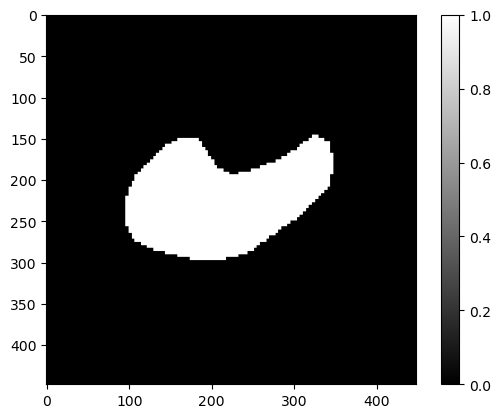

In [21]:
# 载入图像
def load_image(image_path):
    return Image.open(image_path)

# 检查图像是否为二值图像
def check_binary_image(image):
    array = np.array(image)
    unique_values = np.unique(array)
    is_binary = np.array_equal(unique_values, [0, 1]) or np.array_equal(unique_values, [1, 0])
    return is_binary, unique_values

# 显示图像
def plot_image(image):
    plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.show()

# 使用示例
image_path = '../datadrive/bijie/labels/train_resized/df002.png'
image = load_image(image_path)
is_binary, unique_values = check_binary_image(image)
print(f"图像是否为二值图像: {is_binary}")
print(f"图像中的唯一像素值: {unique_values}")
plot_image(image)

将所有图像调整到固定尺寸，并填充多余部分

In [ ]:
from PIL import Image, ImageOps
import os

def resize_and_pad(img, size=(448, 448)):
    # 计算等比例缩放因子
    ratio = min(size[0] / img.size[0], size[1] / img.size[1])
    new_size = (int(img.size[0] * ratio), int(img.size[1] * ratio))
    img = img.resize(new_size, Image.BICUBIC)  # 使用双三次插值缩放图像

    # 创建一个新的图像，大小为448x448，背景色为黑色
    new_img = Image.new("RGB", size, (0, 0, 0))
    # 将缩放后的图像复制到中心
    new_img.paste(img, ((size[0] - new_size[0]) // 2, (size[1] - new_size[1]) // 2))
    return new_img

def process_images(img_dir, output_dir, size=(448, 448)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    img_files = os.listdir(img_dir)
    for img_file in img_files:
        img_path = os.path.join(img_dir, img_file)
        with Image.open(img_path) as img:
            img_resized = resize_and_pad(img, size)
            output_path = os.path.join(output_dir, img_file)
            img_resized.save(output_path)

# 调用函数
img_dir = 'data/train/labels'
output_dir = 'data/train/resized_labels'
process_images(img_dir, output_dir)
